# Fantasy Football

Playing with some data from Fantasy Football from the league I'm playing.

My team is Steely Dan Fan Club an this is our logo

![My Logo](./steely-dan-fan-club_cropped.png)

League's data extracted using [espnfantasyfootball](https://github.com/tbryan2/espnfantasyfootball).

## Initiate

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/players.csv")
mt = pd.read_csv("data/matches.csv")

## Prepare

Rename columns

In [40]:
df.rename(columns={
    "Week": "week",
    "PlayerName": "name",
    "PlayerScoreActual": "score",
    "PlayerScoreProjected": "projected",
    "PlayerFantasyTeam": "team_index",
    "PlayerRosterSlot": "position",
    "TeamName": "team",
    "FullName": "user"
}, inplace=True)
mt.rename(columns={
    "Week": "week",
    "Name1": "team1",
    "Score1": "score1",
    "Name2": "team2",
    "Score2": "score2",
    "Type": "type"
}, inplace=True)

Filter only played weeks

In [41]:
last_full_week=3
df = df[df.week<=last_full_week]

## Some Variables to work with

In [126]:
my_team = "Team Aeiou"
last_full_season = 3

## Working Data

In [42]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681 entries, 0 to 680
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   week        681 non-null    int64  
 1   name        681 non-null    object 
 2   score       681 non-null    float64
 3   projected   681 non-null    float64
 4   team_index  681 non-null    int64  
 5   position    681 non-null    object 
 6   team        681 non-null    object 
 7   user        681 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 47.9+ KB


,week,name,score,projected,team_index,position,team,user
0,1,Davante Adams,15.60,21.204351,1,WR,Team Theis,Maya Theis
1,1,Patrick Mahomes,18.54,24.679680,1,QB,Team Theis,Maya Theis
2,1,Aaron Jones,28.70,16.338186,1,RB,Team Theis,Maya Theis
3,1,T.J. Hockenson,12.00,13.890898,1,TE,Team Theis,Maya Theis
4,1,Brandon Aiyuk,37.90,11.752372,1,WR,Team Theis,Maya Theis


In [43]:
mt.info()
mt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   week    1666 non-null   int64  
 1   team1   1666 non-null   object 
 2   score1  1666 non-null   float64
 3   team2   1666 non-null   object 
 4   score2  1666 non-null   float64
 5   type    1666 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 78.2+ KB


,week,team1,score1,team2,score2,type
0,1,Team Johnson,141.64,Team Quirk,160.76,Regular
1,1,Team Aeiou,132.24,Team Sand,61.10,Regular
2,1,Team Amar,106.98,Team Calzaretta,77.76,Regular
3,1,Team DarkBrandon,89.34,Team Theis,133.44,Regular
4,1,Team Bernier-Simard,112.28,Team FortyTwo,120.94,Regular


# 

Compare players performances throughout the season

In [137]:
def plot_players_score_throughout_season(df, ax, players, title="Players performances throughout the season"):
    """ Given the DataFrame, the axes, and the players names, plot the scores of the players throughout the weeks of the season in the axes
    """
    
    df[df.name.isin(players)][['week', 'name', 'score']]\
        .pivot(columns="name", index="week", values="score")\
        .plot(ax=ax)
    
    ax.set_title(title)
    ax.legend(title=None)
    # ax.set_ylim(bottom=0)
    # Set xticks to be only integers
    from matplotlib.ticker import MaxNLocator
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

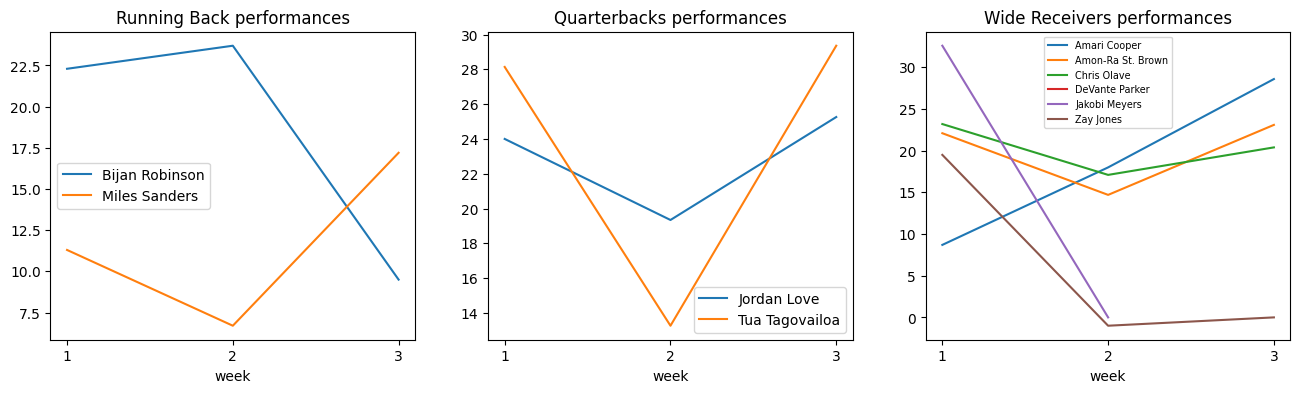

In [138]:
rbs = ["Bijan Robinson", "Miles Sanders"]
wrs = ["Amon-Ra St. Brown", "Chris Olave", "Amari Cooper", "Amari Cooper", "Jakobi Meyers", "DeVante Parker", "Zay Jones"]
qbs = ["Tua Tagovailoa", "Jordan Love"]

fig, ax = plt.subplots(figsize=(16,4), ncols=3)

plot_players_score_throughout_season(df[(df.team==team)], ax[0], rbs, title="Running Back performances")
plot_players_score_throughout_season(df[(df.team==team)], ax[1], qbs, title="Quarterbacks performances")
plot_players_score_throughout_season(df[(df.team==team)], ax[2], wrs, title="Wide Receivers performances")

ax[2].legend(fontsize="x-small")

Comparing projections with actual scores

<Axes: xlabel='score', ylabel='projected'>

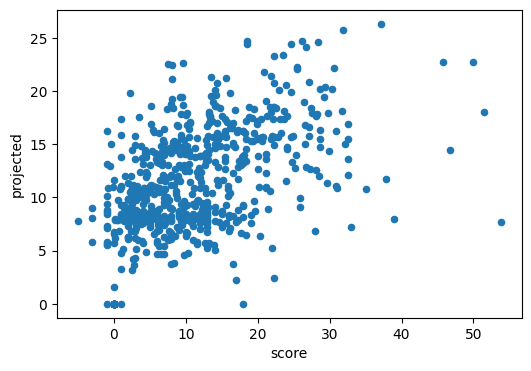

In [144]:
fig, ax = plt.subplots(figsize=(6,4))
df.plot.scatter(x='score', y='projected', ax=ax)

# Some Charts and Tables

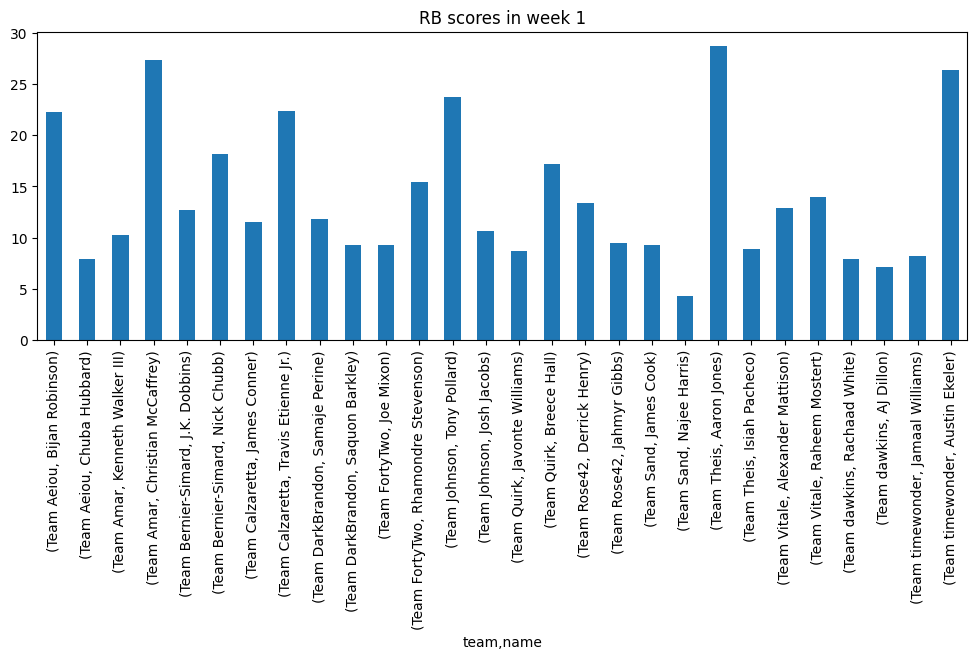

In [13]:
# Players scores in specific week

week = 1
position = 'RB'

rb_score_week_1 = df[(df.week==week) & (df.position==position)][["team", "name", "score"]]\
    .sort_values(by="team")\
    .set_index(["team", "name"])

fig, ax = plt.subplots(figsize=(12, 4))
rb_score_week_1.plot.bar(ax=ax, legend=False)

ax.set_title(f"{position} scores in week {week}")

plt.show()